In [1]:
import pandas as pd
import numpy as nm 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
data = pd.read_csv("UberDataset.csv")
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
#cloning the dataset
clone_data = data.copy()

Q1. How does the frequency of trips vary by quarter?

In [6]:
# Ensure START_DATE is in datetime format
clone_data['START_DATE'] = pd.to_datetime(clone_data['START_DATE'], errors='coerce')

# Extract the quarter from START_DATE
clone_data['QUARTER'] = clone_data['START_DATE'].dt.quarter

# Count the number of trips for each quarter
quarterly_trip_counts = clone_data['QUARTER'].value_counts().sort_index()
quarterly_trip_counts

QUARTER
1.0    105
2.0     93
3.0     97
4.0    126
Name: count, dtype: int64

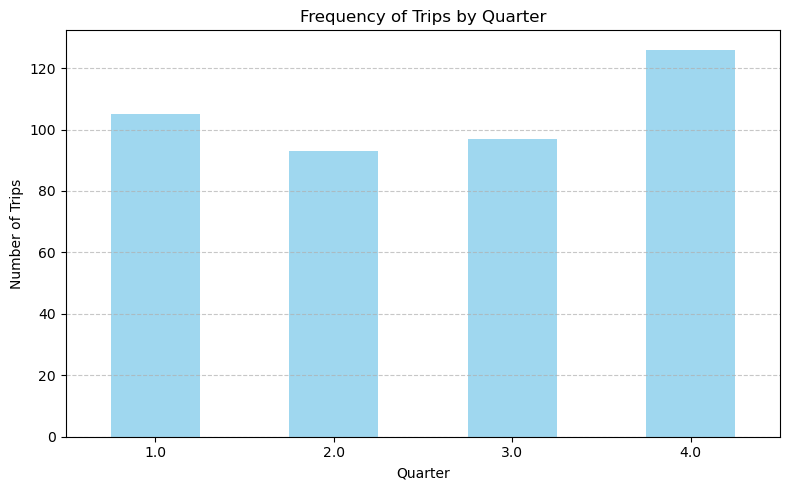

In [7]:
# Visualization: Bar chart
plt.figure(figsize=(8, 5))
quarterly_trip_counts.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Frequency of Trips by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Q2. How do start and stop locations differ between Business and Personal trips?

In [12]:
clone_data['CATEGORY'] = clone_data['CATEGORY'].fillna('Unknown')

# Separate data by CATEGORY
business_trips = clone_data[clone_data['CATEGORY'] == 'Business']
personal_trips = clone_data[clone_data['CATEGORY'] == 'Personal']

In [13]:
# Get top 10 start and  locations for Business trips
business_start = business_trips['START'].value_counts().head(10)
business_start

START
Cary                198
Unknown Location    146
Morrisville          79
Whitebridge          59
Islamabad            52
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Apex                 17
Name: count, dtype: int64

In [14]:
# Get top 10  stop locations for Business trips
business_stop = business_trips['STOP'].value_counts().head(10)
business_stop

STOP
Cary                197
Unknown Location    146
Morrisville          80
Whitebridge          56
Islamabad            53
Lahore               36
Durham               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: count, dtype: int64

In [11]:
# Get top 10 start and locations for Personal trips
personal_start = personal_trips['START'].value_counts().head(10)
personal_start

START
Whitebridge    9
Banner Elk     7
Kissimmee      6
Morrisville    6
Islamabad      5
Preston        4
Orlando        4
Cary           3
Houston        2
Boone          2
Name: count, dtype: int64

In [10]:
# Get top 10 stop locations for Personal trips
personal_stop = personal_trips['STOP'].value_counts().head(10)
personal_stop

STOP
Whitebridge         9
Banner Elk          6
Cary                6
Kissimmee           6
Islamabad           5
Westpark Place      4
Orlando             4
Morrisville         4
Preston             4
Unknown Location    3
Name: count, dtype: int64

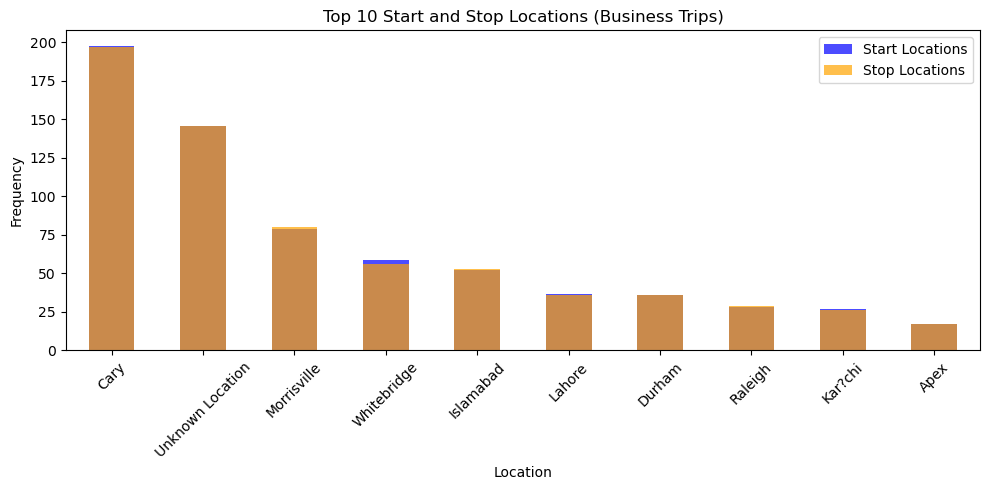

In [15]:
# Plot for Business trips
plt.figure(figsize=(10, 5))
business_start.plot(kind='bar', color='blue', alpha=0.7, label='Start Locations')
business_stop.plot(kind='bar', color='orange', alpha=0.7, label='Stop Locations')
plt.title('Top 10 Start and Stop Locations (Business Trips)')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


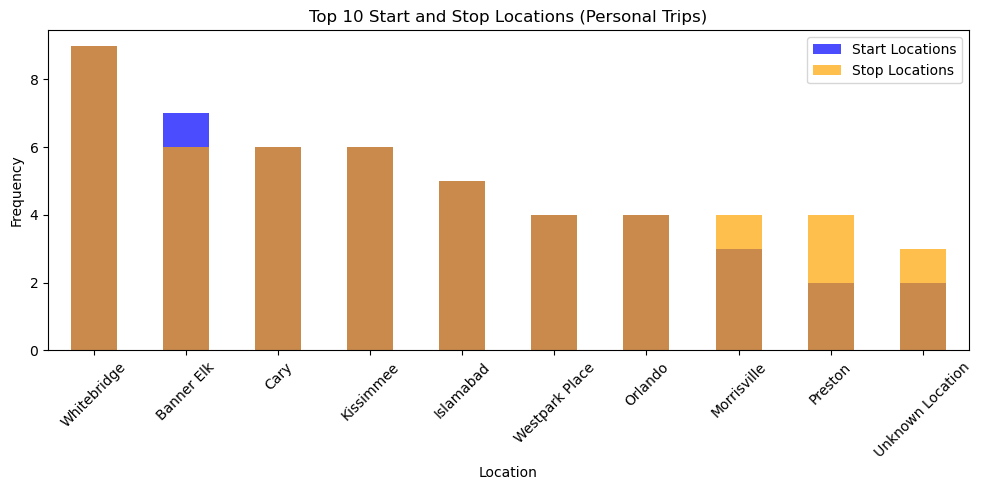

In [16]:
# Plot for Personal trips
plt.figure(figsize=(10, 5))
personal_start.plot(kind='bar', color='blue', alpha=0.7, label='Start Locations')
personal_stop.plot(kind='bar', color='orange', alpha=0.7, label='Stop Locations')
plt.title('Top 10 Start and Stop Locations (Personal Trips)')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Q3. What is the trend in the number of trips over the year?

In [22]:
# Ensure the START_DATE column is in datetime format
clone_data['START_DATE'] = pd.to_datetime(clone_data['START_DATE'], errors='coerce')

# Extract the month from the START_DATE column
clone_data['Month'] = clone_data['START_DATE'].dt.month

# Count the number of trips for each month
monthly_trips = clone_data['Month'].value_counts().sort_index()
monthly_trips

Month
1.0     23
2.0     40
3.0     42
4.0     25
5.0     26
6.0     42
7.0     41
8.0     43
9.0     13
10.0    24
11.0    63
12.0    39
Name: count, dtype: int64

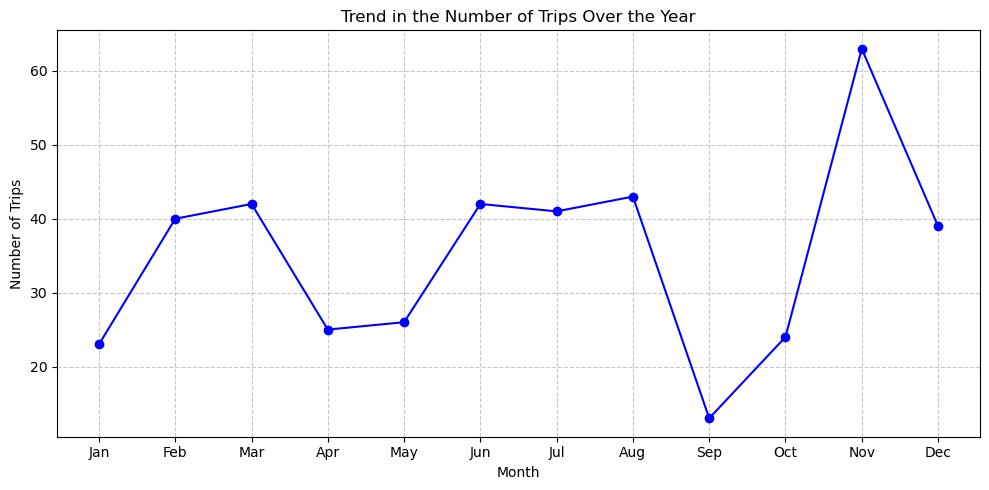

In [21]:
# Create a line chart
plt.figure(figsize=(10, 5))
plt.plot(monthly_trips.index, monthly_trips.values, marker='o', linestyle='-', color='blue')
plt.title('Trend in the Number of Trips Over the Year')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Q4. How does the travel purpose differ by day of the week?

In [24]:
# Extract the day of the week from START_DATE
clone_data['Day_of_Week'] = clone_data['START_DATE'].dt.day_name()

# Group data by day of the week and purpose
purpose_by_day = clone_data.groupby(['Day_of_Week', 'PURPOSE']).size().unstack(fill_value=0)

# Sort days of the week in order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
purpose_by_day = purpose_by_day.reindex(ordered_days)

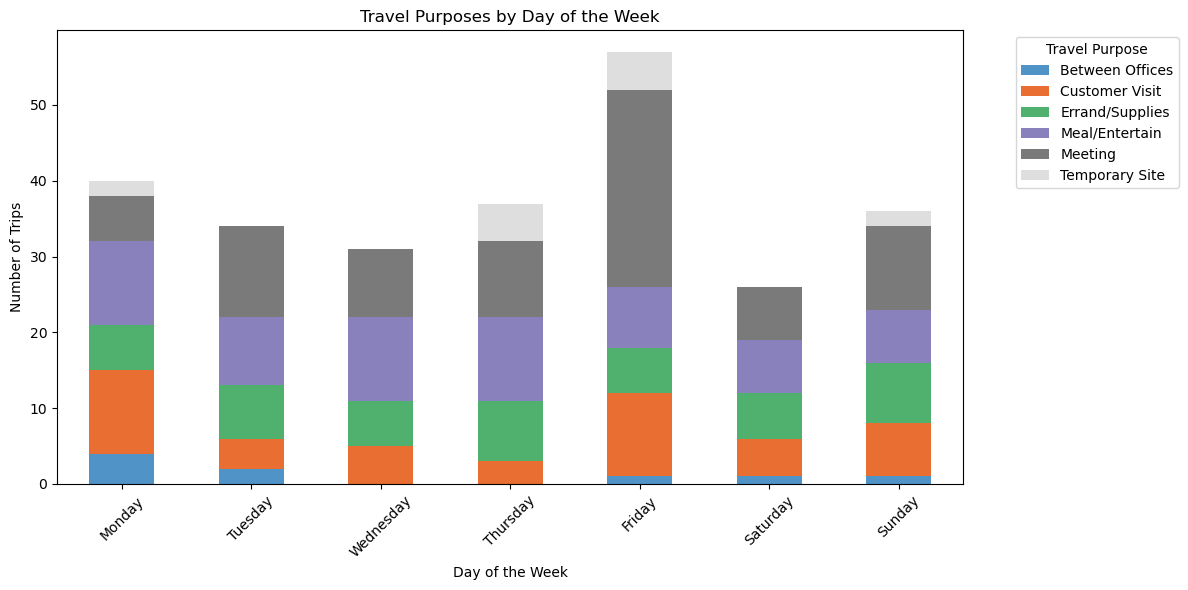

In [23]:
# Plot stacked bar chart
purpose_by_day.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c', alpha=0.85)
plt.title('Travel Purposes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.legend(title='Travel Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Q5. How do total miles traveled vary between weekdays and weekends?

In [27]:
# Extract the day of the week and categorize as Weekday or Weekend
clone_data['Day_of_Week'] = clone_data['START_DATE'].dt.day_name()
clone_data['Day_Type'] = clone_data['Day_of_Week'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)

# Sum total miles traveled for weekdays and weekends
miles_by_day_type = clone_data.groupby('Day_Type')['MILES'].sum()

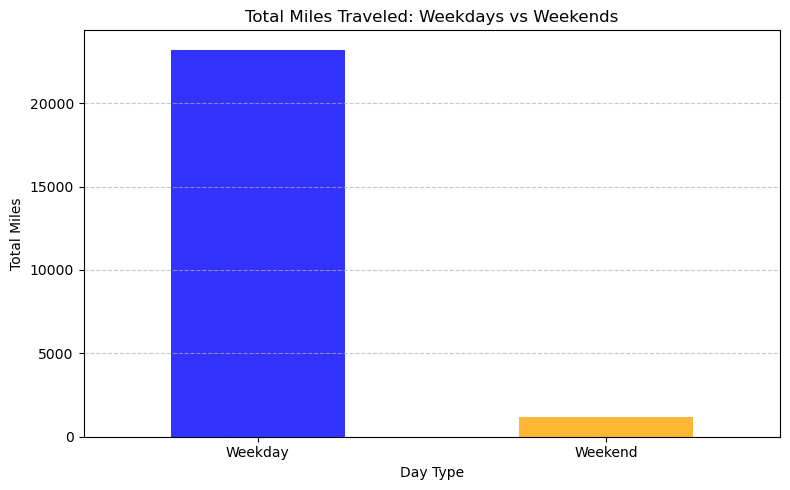

In [28]:
# Bar Chart
plt.figure(figsize=(8, 5))
miles_by_day_type.plot(kind='bar', color=['blue', 'orange'], alpha=0.8)
plt.title('Total Miles Traveled: Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Total Miles')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()